In [1]:
import cv2
import numpy as np
import os
from sklearn import svm, metrics
import matplotlib.pyplot as plt

In [2]:
current_dir= os.getcwd()
folder_path = ""+ current_dir +"\\test"
print(folder_path)
ListimagesTest = []


folder_path_train= ""+ current_dir +"\\train"
ListimagesTrain = []


nbImagesNORMALTest = 0
nbImagesPNEUMONIATest = 0

nbImagesNORMALTrain = 0

nbImagesPNEUMONIATrain2 = 0
nbImagesPNEUMONIATrain = 0


C:\Users\ferre\Desktop\machine_learning\Dataset_IA\T_DEV_810_dataset\test


In [3]:
for filename in os.listdir(folder_path+'\\NORMAL'):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Ouvrir l'image et l'ajouter à la liste
            img = cv2.imread(os.path.join(folder_path+'\\NORMAL', filename))
            nbImagesNORMALTest +=1
            ListimagesTest.append(img)
for filename in os.listdir(folder_path+'\\PNEUMONIA'):
   
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder_path+'\\PNEUMONIA', filename))
            nbImagesPNEUMONIATest +=1
            ListimagesTest.append(img)

In [4]:
for filename in os.listdir(folder_path_train+'\\NORMAL'): 
    if(nbImagesNORMALTrain < 400):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder_path_train+'\\NORMAL', filename))
            nbImagesNORMALTrain+=1
            ListimagesTrain.append(img)
        
for filename in os.listdir(folder_path_train+'\\PNEUMONIA'):  
    if(nbImagesPNEUMONIATrain < 400):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"): 
            img = cv2.imread(os.path.join(folder_path_train+'\\PNEUMONIA', filename))
            nbImagesPNEUMONIATrain +=1
            ListimagesTrain.append(img)
print(nbImagesPNEUMONIATrain)

400


In [5]:
img0shape = (300, 300)
ListimagesTestResize = []
ListimagesTrainResize = []

for img in ListimagesTest :
    ListimagesTestResize.append(cv2.resize(img,img0shape))
    
    
for img in ListimagesTrain :
    ListimagesTrainResize.append(cv2.resize(img,img0shape))

In [6]:
ListimagesTestNorm = []
ListimagesTrainNorm = []

for img in ListimagesTestResize:
    ListimagesTestNorm.append(cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F))
for img in ListimagesTrainResize:
    ListimagesTrainNorm.append(cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F))

In [7]:
ListimagesTestNorm = np.array(ListimagesTestNorm).reshape(len(ListimagesTestNorm),-1)
ListimagesTrainNorm= np.array(ListimagesTrainNorm).reshape(len(ListimagesTrainNorm), -1)



In [8]:

unTest = np.array(np.ones(nbImagesPNEUMONIATest))
zeroTest = np.array(np.zeros(nbImagesNORMALTest))

unTrain =np.array(np.ones(400))
zeroTrain = np.array(np.zeros(400))

ListimagesTestNormResult = np.concatenate((zeroTest ,unTest) )
ListimagesTrainNormResult = np.concatenate((zeroTrain ,unTrain) )

In [9]:
print(len(ListimagesTrainNormResult))
print(len(ListimagesTrainNorm))


print(ListimagesTrainNormResult)

800
800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [10]:
clf = svm.SVC(gamma=0.001)
clf.fit(ListimagesTrainNorm, ListimagesTrainNormResult)

SVC(gamma=0.001)

In [11]:
predict= clf.predict(ListimagesTestNorm)

In [12]:
print(predict)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.

In [13]:
print(ListimagesTestNormResult)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [14]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(ListimagesTestNormResult, predict)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74       234
         1.0       0.85      0.83      0.84       390

    accuracy                           0.80       624
   macro avg       0.78      0.79      0.79       624
weighted avg       0.80      0.80      0.80       624




In [15]:
print(nbImagesPNEUMONIATrain+ nbImagesNORMALTrain)

800


Confusion matrix:
[[175  59]
 [ 67 323]]


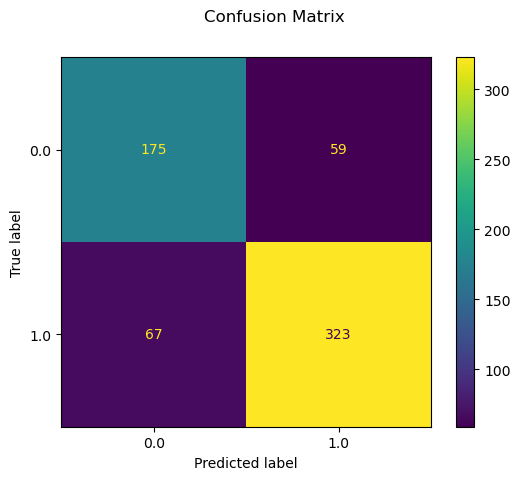

In [16]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(ListimagesTestNormResult, predict)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [17]:
predict= clf.predict(ListimagesTrainNorm)

In [18]:
print(len(predict))

800


Confusion matrix:
[[400   0]
 [  0 400]]


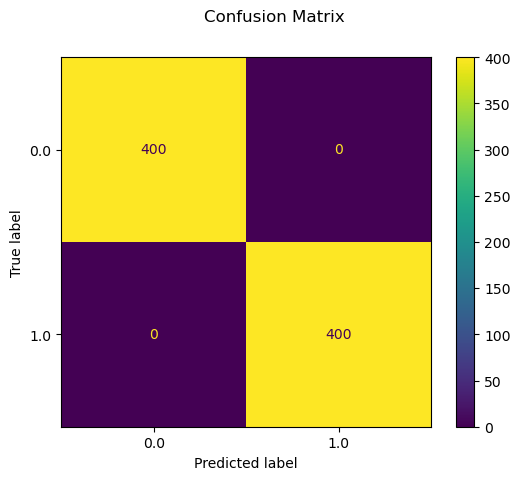

In [19]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(predict, ListimagesTrainNormResult)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()